A company you have been working for has run a television advertising campaign, and you have been
asked to analyse it. The campaign ran from 2015-02-07 till 2015-04-15, across 6 different TV channels.
The television agency has provided the file spots.csv outlining the details of every TV spot:
spots.csv: Each row corresponds to a single broadcast of the advert. Column descriptions:
agency_spot_time: advert broadcast time as supplied by the agency
price: the price of this spot in Euros
spot_id: the unique id number of this spot
channel: the channel this ad spot was broadcast on. There are 6 channels: A,B,C,D,E,F
Your engineering team has provided a file traffic.csv which shows the new traffic to the website from
2015-01-01 00:00 till 2015-07-01 00:00, at aggregated second resolution.
traffic.csv: Each row represents the time where one or more new users first visited the site. Column
descriptions:
index: Visit time
total: Number of new users who first visited the site at this time

In [1]:
# 1 Produce 2 plots of the data, in what you consider to be the most useful/ informative way,
#presentation is important

In [107]:
import pandas as pd
import numpy as np
import os

In [108]:
# Read the two files 
spots=pd.read_csv("spots.csv")


In [109]:
#lets have a look into the sports data
spots.head(10)

,agency_spot_time,cost,channel,spot_id,viziters,Event
0,2/7/2015 9:43,4128,D,0,5.0,1
1,2/7/2015 10:27,2351,C,1,7.0,1
2,2/7/2015 11:10,1417,E,2,9.0,1
3,2/7/2015 12:30,773,C,3,3.0,1
4,2/7/2015 13:01,1746,B,4,7.0,0
5,2/7/2015 15:27,3818,D,5,7.0,0
6,2/7/2015 15:50,1783,E,6,6.0,0
7,2/7/2015 16:10,100,E,7,1.0,1
8,2/7/2015 16:11,1204,E,8,1.0,1
9,2/7/2015 17:19,4920,E,9,2.0,0


In [110]:
# lets look into the dataset 
spots.dtypes

agency_spot_time     object
cost                  int64
channel              object
spot_id               int64
viziters            float64
Event                 int64
dtype: object

In [111]:
spots['agency_spot_time']=pd.to_datetime(spots['agency_spot_time'])

In [56]:
#problems in variables
#Numeric Variables 
#1 Missing Value in numeric variables
#2 Outliers in numeric variables
#Categricial Variables 
#3 Missing Value in Categorical Variables
#4 Ouliers in Categorical Variables
#5 Issue of cardinality
#6 Issue of rare labels


In [53]:
# find categorical variables
categorical = [var for var in spots.columns if spots[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 2 categorical variables


In [54]:
# find numerical variables
numerical = [var for var in spots.columns if spots[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 4 numerical variables


In [19]:
spots.isnull().sum()

agency_spot_time    0
cost                0
channel             0
spot_id             0
viziters            4
Event               0
dtype: int64

In [60]:
categorical

['channel']

In [16]:
#replace all the categorical variables when missing value is less than 30%
for x in categorical:
    spots[x]= spots[x].fillna(spots[x].value_counts().index[0])

In [62]:
#replace all the categorical variables when missing value is more than 30% 
for x in categorical:
    # add additional variable to indicate missingness
    spots[x+'_NA'] = np.where(spots[x].isnull(), "Missing ", spots[x])

In [17]:
spots.head(5)

,agency_spot_time,cost,channel,spot_id,viziters,Event
0,2015-02-07 09:43:00,4128,D,0,5.0,1
1,2015-02-07 10:27:00,2351,C,1,7.0,1
2,2015-02-07 11:10:00,1417,E,2,9.0,1
3,2015-02-07 12:30:00,773,C,3,3.0,1
4,2015-02-07 13:01:00,1746,B,4,7.0,0


There are multiple ways of accounting for rare labels. Some of them handle rare labels at the same time of converting labels into numbers. I will explain those in the section "Engineer labels of categorical variables".

In this section of the course, I will expand on how to handle rare labels by re-categorising the observation that show rare labels for a certain variable. These observations can be re-categorised by:

    Replacing the rare label by most frequent label
    Grouping the observations that show rare labels into a unique category (with a new label like 'Rare', or 'Other')

In this and the coming lectures I will explain when it is convenient to use one or the other way of replacing rare values, and evaluate the consequences of replacing rare labels in variables with:

    One predominant category
    A small number of categories
    High cardinality


In [90]:
# ENgineering  rare levels in Categorical Variables 
spots.groupby(["channel"])["channel"].count()

channel
        7
A     110
B     156
C     141
D     195
E     178
F      77
Name: channel, dtype: int64

In [65]:
#Categorical Encoding as machine lerning models are not adept to handle categorical variables 
# Ont hot encoding
# ordinal numbering
# count of frequency encoding
# target guided encoding 
# mean encoding
# WOE encoding





In [21]:
#One hot Encoding 
data_OHE = pd.concat([spots[numerical], # numerical variables 
                      pd.get_dummies(spots[categorical], drop_first=True)],   # binary categorical variable
                     axis=1)

In [67]:
#ordinal numbering
channel_map = {'A':1,
               'B':2,
               'C':3,
               'D':4,
               'E':5,
               'F':6
               
}

spots['channel_ordinal'] = spots.channel.map(channel_map)
spots.head(10)

,agency_spot_time,cost,channel,spot_id,viziters,Event,channel_NA,channel_ordinal
0,2015-02-07 09:43:00,4128,D,0,5.0,1,D,4.0
1,2015-02-07 10:27:00,2351,C,1,7.0,1,C,3.0
2,2015-02-07 11:10:00,1417,E,2,9.0,1,E,5.0
3,2015-02-07 12:30:00,773,C,3,3.0,1,C,3.0
4,2015-02-07 13:01:00,1746,B,4,7.0,0,B,2.0
5,2015-02-07 15:27:00,3818,D,5,7.0,0,D,4.0
6,2015-02-07 15:50:00,1783,E,6,6.0,0,E,5.0
7,2015-02-07 16:10:00,100,E,7,1.0,1,E,5.0
8,2015-02-07 16:11:00,1204,E,8,1.0,1,E,5.0
9,2015-02-07 17:19:00,4920,E,9,2.0,0,E,5.0


In [78]:
#count of frequency encoding 
channel_frequency_map=spots.channel.value_counts().to_dict()
spots['channel_freq'] = spots.channel.map(channel_frequency_map)

In [79]:
#target guided encoding
ordered_labels =spots.groupby(['channel'])['Event'].mean().sort_values().index
ordinal_label = {k:i for i, k in enumerate(ordered_labels, 0)} 
spots['channel_target'] = spots.channel.map(ordinal_label)

In [80]:
# mean encoding 
ordered_labels =spots.groupby(['channel'])['Event'].mean().to_dict()

spots['channel_mean'] = spots.channel.map(ordered_labels)

In [87]:
spots.head(10)

,agency_spot_time,cost,channel,spot_id,viziters,Event,channel_freq,channel_target,channel_mean
0,2015-02-07 09:43:00,4128,D,0,5.0,1,191.0,1.0,0.481675
1,2015-02-07 10:27:00,2351,C,1,7.0,1,141.0,5.0,0.546099
2,2015-02-07 11:10:00,1417,E,2,9.0,1,178.0,4.0,0.522472
3,2015-02-07 12:30:00,773,C,3,3.0,1,141.0,5.0,0.546099
4,2015-02-07 13:01:00,1746,B,4,7.0,0,156.0,2.0,0.500000
5,2015-02-07 15:27:00,3818,D,5,7.0,0,191.0,1.0,0.481675
6,2015-02-07 15:50:00,1783,E,6,6.0,0,178.0,4.0,0.522472
7,2015-02-07 16:10:00,100,E,7,1.0,1,178.0,4.0,0.522472
8,2015-02-07 16:11:00,1204,E,8,1.0,1,178.0,4.0,0.522472
9,2015-02-07 17:19:00,4920,E,9,2.0,0,178.0,4.0,0.522472


In [85]:
prob_df["channel"]=spots["channel"]
prob_df = spots.groupby(['channel'])['Event'].mean()
prob_df = pd.DataFrame(prob_df)
prob_df['Not_Event'] = 1-prob_df.Event
prob_df.loc[prob_df.Event == 0, 'Event'] = 0.00001
prob_df['WoE'] = np.log(prob_df.Event/prob_df.Not_Event)

In [86]:
prob_df.head(10)

,Event,Not_Event,WoE
channel,,,
,0.571429,0.428571,0.287682
A,0.518182,0.481818,0.072759
B,0.500000,0.500000,0.000000
C,0.546099,0.453901,0.184922
D,0.482051,0.517949,-0.071826
E,0.522472,0.477528,0.089948
F,0.454545,0.545455,-0.182322


In [105]:
#Transformation of continous varaibles 
for x in numerical:
    spots[x]= spots[x].fillna(spots[x].mean)

In [16]:
numerical[1]

'cost'

In [27]:
    IQR = spots["cost"].quantile(0.75) - spots["cost"].quantile(0.25)
    Upper_fence = spots["cost"].quantile(0.75) + (IQR * 3)
    Lower_fence = spots["cost"].quantile(0.75) - (IQR * 3)
    print(Upper_fence)
    print(x)
    spots.loc[spots["cost"]<Lower_fence, "cost"] = Lower_fence

10725.0
agency_spot_time


In [31]:
#outlier removal 
for x in numerical:
    IQR = spots[x].quantile(0.75) - spots[x].quantile(0.25)
    Upper_fence = spots[x].quantile(0.75) + (IQR * 3)
    Lower_fence = spots[x].quantile(0.75) - (IQR * 3)
    spots.loc[spots[x]<Lower_fence, x] = Lower_fence
    spots.loc[spots[x]>Upper_fence, x] = Upper_fence

In [22]:
spots=data_OHE

In [24]:
spots.dtypes

agency_spot_time    datetime64[ns]
cost                         int64
spot_id                      int64
viziters                   float64
Event                        int64
channel_A                    uint8
channel_B                    uint8
channel_C                    uint8
channel_D                    uint8
channel_E                    uint8
channel_F                    uint8
dtype: object

In [123]:
import datetime
#feature engineering
spots['agency_spot_time'] = pd.to_datetime(spots['agency_spot_time'])
spots['day'] = spots['agency_spot_time'].dt.date
spots['hour'] = spots['agency_spot_time'].dt.hour
days=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
day_name=[]
k=0
for x in spots['day']:
    date=pd.to_datetime(x)
    dayNumber=date.weekday()
    day_name.insert(k,days[dayNumber])
    k=k+1
    

In [126]:
spots["day_name"]=day_name

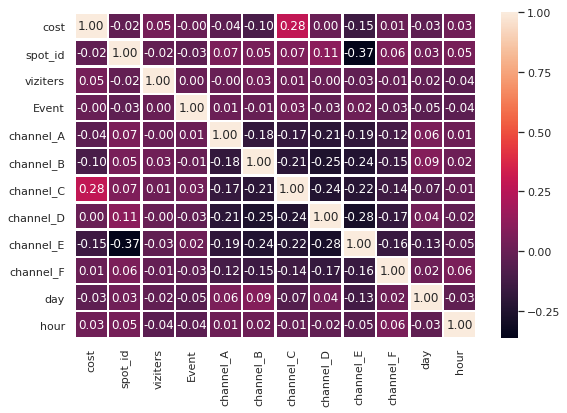

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
#EDA 
corr = spots.corr()

f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(corr, annot = True, linewidths=1.5 , fmt = '.2f',ax=ax)
plt.show()

In [ ]:
cost                         int64
channel                     object
spot_id                      int64
viziters                   float64
Event                        int64
dtype: object

/usr/local/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


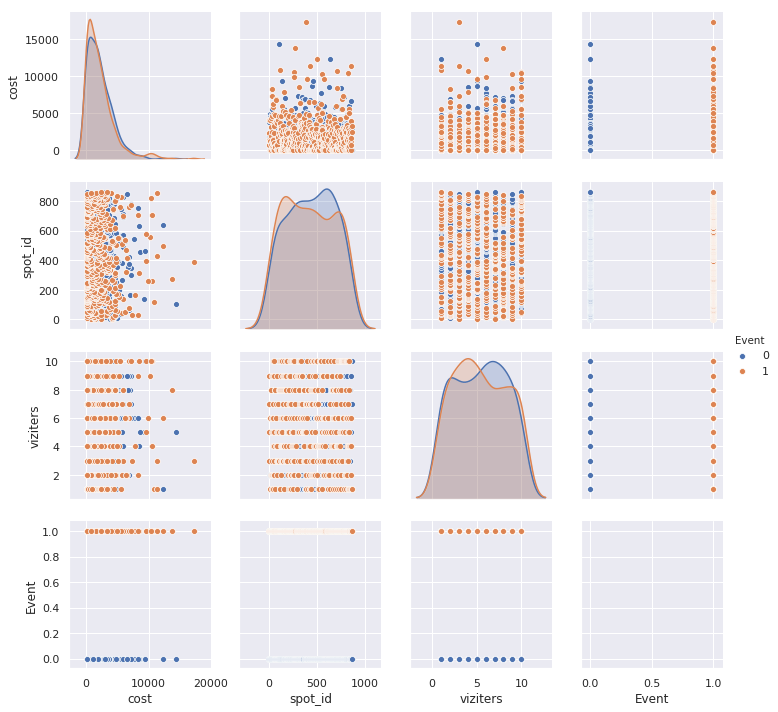

In [57]:
sns.pairplot(spots, hue = 'Event', vars = ['cost', 'spot_id', 'viziters', 'Event'] )

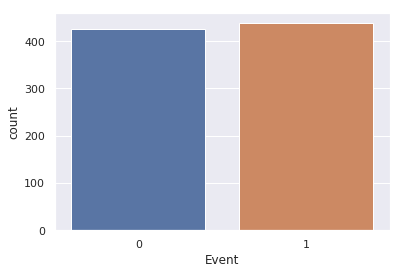

In [58]:
sns.countplot(spots.Event, label = "Count") 

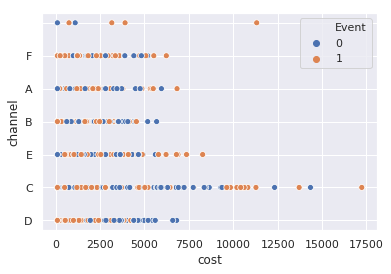

In [59]:
sns.scatterplot(x = 'cost', y = 'channel', hue = 'Event', data = spots)

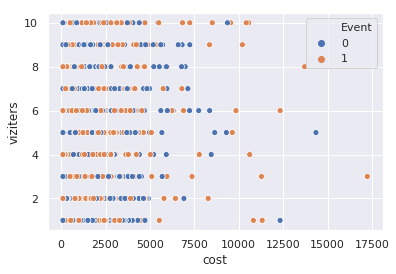

In [60]:
sns.scatterplot(x = 'cost', y = 'viziters', hue = 'Event', data = spots)

In [65]:
twt2= spots.groupby(["hour"])["cost"].sum().reset_index()

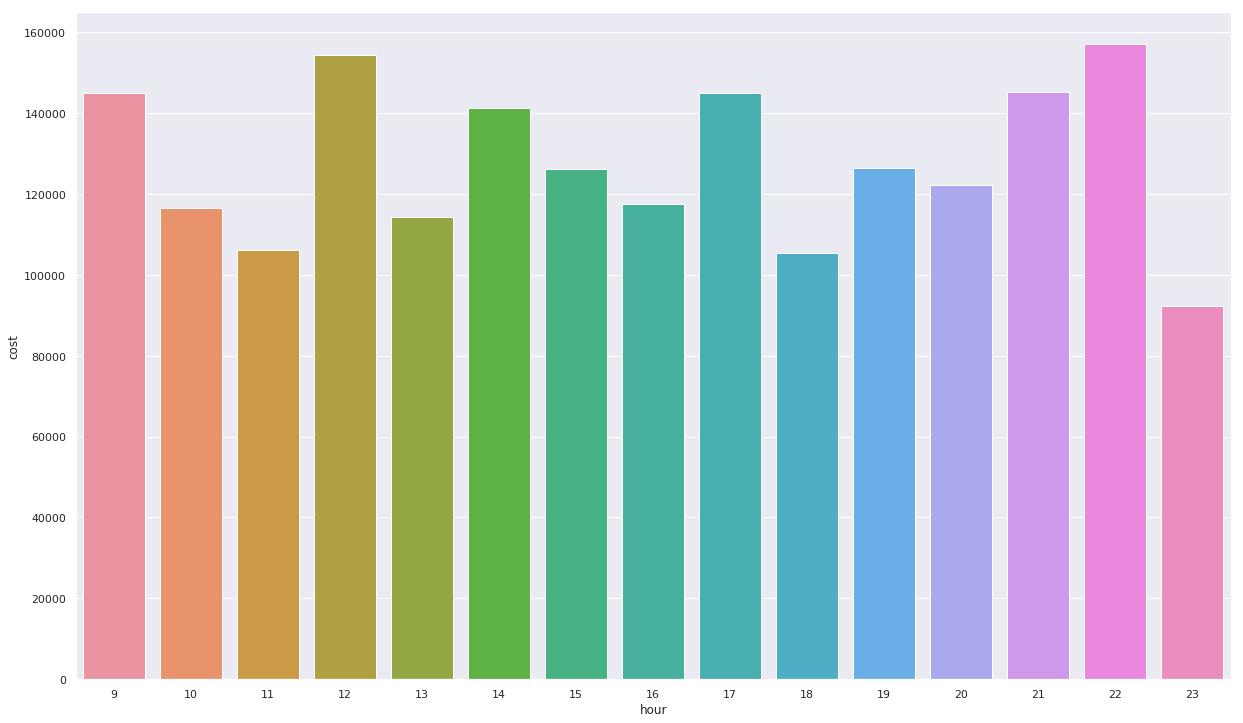

In [69]:
#Now we look into the insight where money is spends in all time of the day insrespective of tv channels
# so for example as a company i want to do mass marketing and give my adds to all channels 
twt2= spots.groupby(["hour"])["cost"].sum().reset_index()
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(20.7, 12.27)
sns.barplot(x=twt2.hour, y=twt2.cost, data=twt2, saturation=0.8)

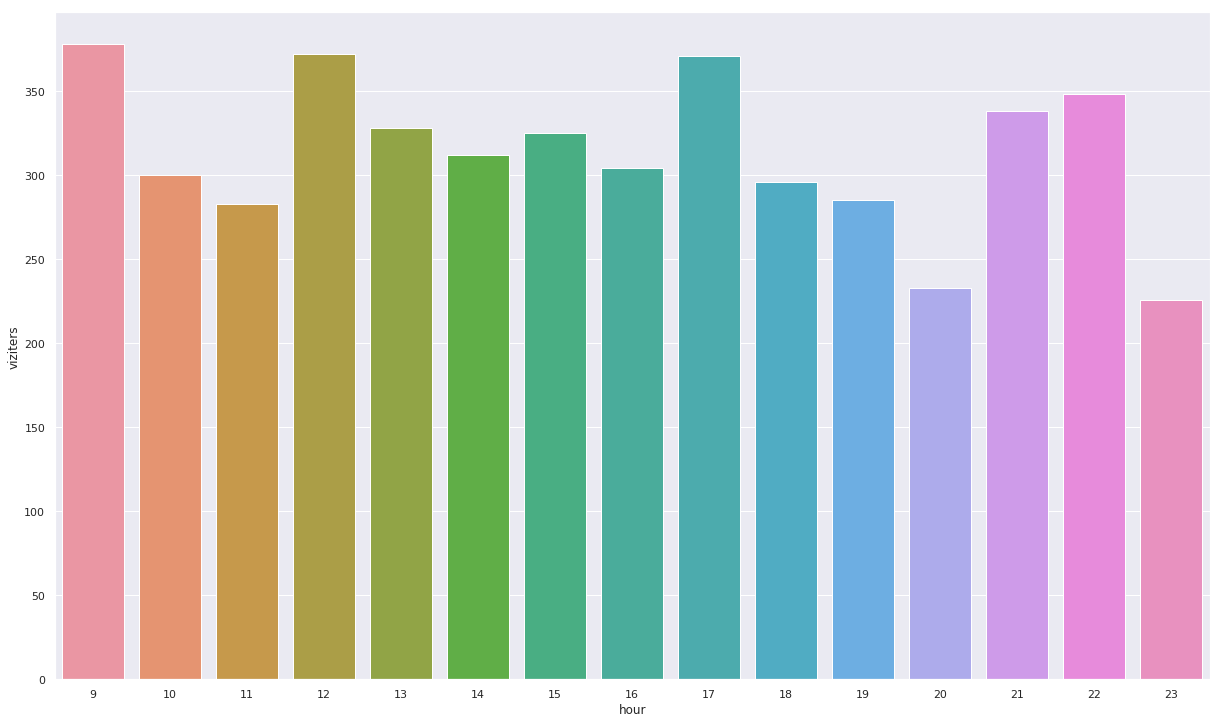

In [142]:
#Now we look into the insight where money is spends in all time of the day insrespective of tv channels
# so for example as a company i want to do mass marketing and give my adds to all channels 
twt2= spots.groupby(["hour"])["viziters"].sum().reset_index()
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(20.7, 12.27)
sns.barplot(x=twt2.hour, y=twt2.viziters, data=twt2)

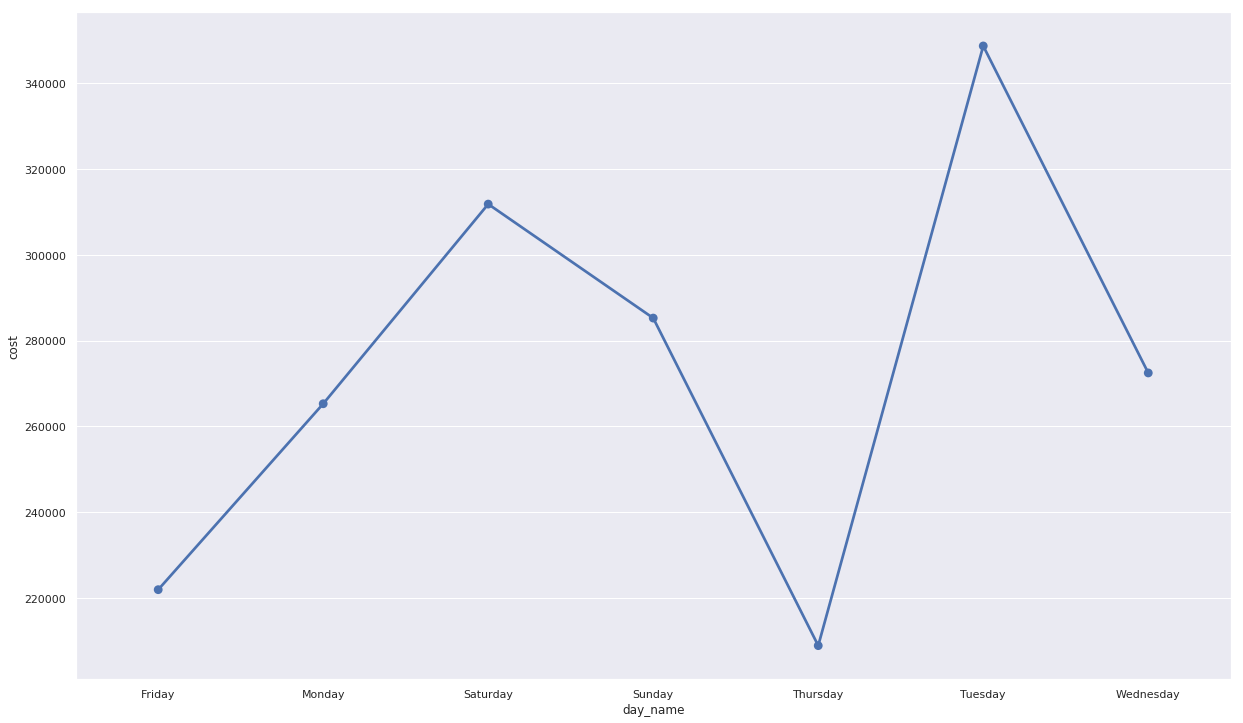

In [136]:
#Now we look into the insight where money is spends in all time of the day insrespective of tv channels
# so for example as a company i want to do mass marketing and give my adds to all channels 
twt3= spots.groupby(["day_name"])["cost"].sum().reset_index()
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(20.7, 12.27)
sns.pointplot(x=twt3.day_name, y=twt3.cost, data=twt3, saturation=0.8)

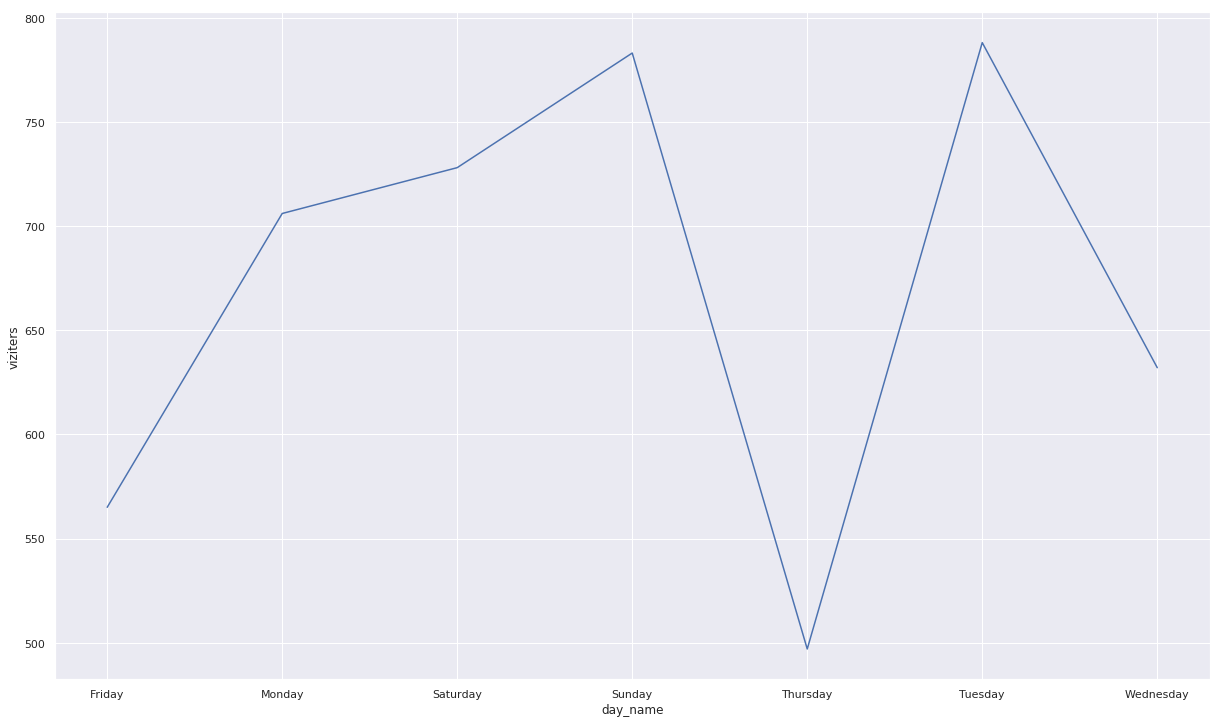

In [135]:
twt3= spots.groupby(["day_name"])["viziters"].sum().reset_index()
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(20.7, 12.27)
sns.lineplot(x=twt3.day_name, y=twt3.viziters, data=twt3)